# Confidence intervals 

### Christian Holm Christensen

## Normal distribution - $N(\mu,1)$

Suppose we have a true distribution of some observable $\theta$ given by a normal distribution 

$$f(\theta;\mu\sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac12\left(\frac{\theta-\mu}{\sigma}\right)^2}\quad,$$ 

where $\mu$ is the mean and $\sigma^2$ the variance.   Without loss of generality we will set $\sigma=1$ below.  We will also start considering the case $\mu=0$.  First, we see that the distribution is indeed normalised over $\mathbb{R}$

In [1]:
import sympy as sy 
sy.init_printing()

In [2]:
theta, mu = sy.symbols('theta mu',real=True)
sigma = sy.symbols('sigma',real=True,positive=True)
g = 1/(sy.sqrt(2*sy.pi)*sigma)*sy.exp(-sy.S.Half*((theta-mu)/sigma)**2)
f = g.subs({mu:sy.S.Zero,sigma:sy.S.One})
f.integrate((theta,-sy.oo,sy.oo))

Next, we consider the $p$ central confidence band defined as 

$$\int_{a}^{b}d\theta\,f(\theta) = p\quad.$$ 

Since $f$ is obviously symmetric around 0, we have that $b=-a$.  Thus we want to find $c>0$ such that 

$$\int_{-c}^{+c}d\theta\,f(\theta) = p\quad.$$

In [3]:
c,p = sy.symbols('c,p',real=True,positive=True)
ic = f.integrate((theta,-c,c))
sc = sy.solve(ic-p,c)[0]
sy.Equality(c,sc,evaluate=False)

Let us plot this function 

In [4]:
pl = sy.plot(sc,(p,0,.9999),ylabel=r'$c$',xlabel=r'$p$')

<Figure size 640x480 with 1 Axes>

With this result, we can directly evaluate, for a given $p$ what $l$ we should choose

In [5]:
pcc = {pv:float(sc.evalf(subs={p:pv})) for pv in [.68,.9,.95]}
for pv, pl in pcc.items():
    print(f'p={pv*100:2.0f}% -> c={pl:.2}')

p=68% -> c=0.99
p=90% -> c=1.6
p=95% -> c=2.0


We can do the same thing for _lower_ and _upper_ bounds i.e., 

\begin{align*}
  \int_{-l}^{\infty} d\theta\,f(\theta) &= p\\
  \int_{-\infty}^{h}d\theta\, f(\theta) &= p\quad,
\end{align*}

for lower and upper bounds respectively (note, we set lower bound to negative $-l$ because $f$ is symmetric). 

In [6]:
l = sy.symbols('l',real=True)
il = f.integrate((theta,-l,sy.oo)).simplify()
sl = sy.solve(il-p,l)[0]
sy.Equality(l,sl,evaluate=False)

In [7]:
h = sy.symbols('h',real=True)
ih = f.integrate((theta,-h,sy.oo)).simplify()
sh = sy.solve(ih-p,h)[0]
sy.Equality(h,sh,evaluate=False)

We see that $l=h$ which isn't surprising given that $f$ is symmetric around $\theta=0$.  Again, we can evaluate the exact $l,h$ for given $p$

In [8]:
pclh = {pv:(float(sc.evalf(subs={p:pv})),
            -float(sl.evalf(subs={p:pv})),
            +float(sh.evalf(subs={p:pv}))) 
       for pv in [.68,.9,.95]}
for pv, (cc,ll,hh) in pclh.items():
    print(f'p={pv*100:2.0f}% ->c={cc:4.2} l={ll:5.2} h={hh:4.2}')

p=68% ->c=0.99 l=-0.47 h=0.47
p=90% ->c= 1.6 l= -1.3 h= 1.3
p=95% ->c= 2.0 l= -1.6 h= 1.6


For $\mu\neq0$, we have 

In [9]:
a, b = sy.symbols('a b',real=True)
sy.Eq(f.integrate((theta,a-mu,b-mu)),
      g.subs(sigma,sy.S.One).integrate((theta,a,b)))

Similarly one can quickly see that 

In [10]:
sy.Eq(f.integrate((theta,(a-mu)/sigma,(b-mu)/sigma)),
      g.integrate((theta,a,b)))

which means that in general 

- $p$ central confidence bound is given by $\pm\sqrt{2}\mathrm{erf}^{-1}(p)\sigma+\mu$, 
- $p$ lower confidence bound is given by $-\sqrt{2}\mathrm{erf}^{-1}(2p-1)\sigma+\mu$, and
- $p$ upper confidence bound is given by $\sqrt{2}\mathrm{erf}^{-1}(2p-1)\sigma+\mu$.

These are of course well-known results and leads us the the mnemonics that $1\sigma$ on either side of the mean covers $68\%$ percent, and $2\sigma$ around the mean cover $95\%$. 

We return to the case that $\sigma=1$ but we let $\mu$ vary from 0 to ten.   Using the above, we can easily plot the central, lower, and upper confidence bands 

In [11]:
import matplotlib.pyplot as plt 
import numpy as np 

In [12]:
fig, ax = plt.subplots(ncols=3,sharey=True,sharex=True,
                       gridspec_kw=dict(wspace=0))
mus = np.linspace(0,10,100)

clh = np.array(list(pclh.values())).T
ps  = np.array(list(pclh.keys()))
ll  = mus.min()+clh.min()
hh  = mus.max()+clh.max()

for i, os in enumerate(clh):
    ax[i].set_xlabel(r'$\theta$')
    ax[i].axhline(8,linestyle='--',color='gray')
    for pp,oo in zip(ps[::-1],os[::-1]):
        lbl = fr'${pp*100:2.0f}\%$'
        
        if i == 0:
            ax[i].fill_between(mus,mus-oo,mus+oo,label=lbl)
        elif i == 1: 
            ax[i].fill_between(mus,mus+oo,hh,label=lbl)
        elif i == 2:
            ax[i].fill_between(mus,ll,mus+oo,label=lbl)
            
ax[0].set_ylabel(r'$\hat\theta$')
ax[0].set_xlim(mus[0],mus[-1])
ax[0].set_ylim(ll,hh)
ax[0].set_title('Central')
ax[1].set_title('Lower')
ax[2].set_title('Upper')
ax[2].legend(bbox_to_anchor=(1,1),loc='upper left');

To evaluate the confidence limits at a particular observed value $\hat\theta$, for example $\hat\theta=8$ as shown in the plot, we can simply evaluate the pre-computed values and add 8 

In [13]:
thetahat=8
for pv, (cc,ll,hh) in pclh.items():
    print(f'p={pv*100:2.0f}% -> '
          f'c={thetahat-cc:4.2} - {thetahat+cc:5.2} '
          f'l={ll+thetahat:4.2} '
          f'h={hh+thetahat:4.2}')

p=68% -> c= 7.0 -   9.0 l= 7.5 h= 8.5
p=90% -> c= 6.4 -   9.6 l= 6.7 h= 9.3
p=95% -> c= 6.0 - 1e+01 l= 6.4 h= 9.6


Alternatively, we can evaluate the confidence levels numerically.  We will do this by evaluating the PDF $f$ over a range of $x$ values for a set of $\theta$ values.  We will then calculate the CDF $F$, and find the appropriate limits.  The limits we find are 

- Lower $p$ limit is given by least $l$ so that $F(l;\theta)>1-p$
- Upper $p$ limis is given by least $h$ so that $F(h;\theta)>p$
- Centre $p$ limits is given by least $c,d$ so that $F(c;\theta)>(1-p)/2$ and $F(d;\theta)>(1+p)/2$ 

First, we calculate the CDF 

In [14]:
import scipy as sp
import scipy.stats 

xrng  =  np.linspace(-5,15,200)[:,np.newaxis]
murng =  np.linspace(0,10,100)
gcdf  =  sp.stats.norm.pdf(xrng,murng).cumsum(axis=0)
gcdf  /= gcdf.max()

Let us plot the CDF 

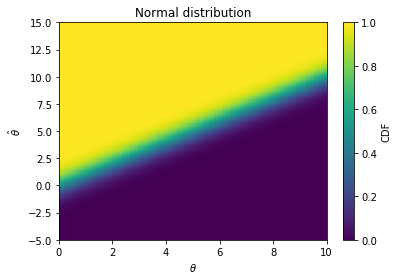

In [15]:
plt.pcolor(*np.meshgrid(murng,xrng),gcdf)
plt.colorbar(label='CDF')
plt.title('Normal distribution')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\hat\theta$');

Next, we define a set of functions to find the limits as outlined above.  Note,the functions `low`,`upp`, also return the constant upper and lower bounds (set by the CDF), respectively.  This is done to streamline the plotting routine below. 

In [16]:
def argcl(cdf, lim):
    return np.argmax(cdf > lim,axis=0)
    
def xcl(x,cdf,lim):
    return x[argcl(cdf,lim)][:,0]
    
def low(x,cdf,p):
    return xcl(x,cdf,1-p),x[len(cdf)-1]*np.ones(cdf.shape[1])

def upp(x,cdf,p):
    return xcl(x,cdf,p),x[0]*np.ones(cdf.shape[1])

def cen(x,cdf,p):
    return xcl(x,cdf,(1-p)/2),xcl(x,cdf,(1+p)/2)

We can then define a simple function to plot the limits in three different panels.  This function takes _any_ numerically evaluated CDF and any number of confidence limits and displays these.  Alternatively we can provide a dictionary that maps a probability to a hatching style.  

In [17]:
def plotcl(x,theta,cdf,ps,hatch={}):
    fig, ax = plt.subplots(ncols=3,sharex=True,sharey=True,
                           gridspec_kw=dict(wspace=0))
    
    ret = dict(theta=theta)
    for p in ps:
        lbl = fr'${p*100:2.0f}\%$'
        ret[p] = []
        for a,f in zip(ax,[cen,low,upp]):
            l,h = f(x,cdf,p)
            a.fill_between(theta,l,h,label=lbl,
                           alpha=.5,hatch=hatch.get(p,None))
            ret[p].append([l,h])
            
    for a,t in zip(ax,['Centre','Lower','Upper']):
        a.set_title(t)
        a.set_xlabel(r'$\theta$')
        
    ax[0].set_xlim(theta[0],theta[-1])
    ax[0].set_ylim(theta[0],theta[-1])
    ax[0].set_ylabel(r'$\hat\theta$')
    ax[2].legend(loc='upper left',bbox_to_anchor=(1,1))
    
    return ret

We apply the plotting function to our evaluated CDF for a normal distribution with varying $\mu$. 

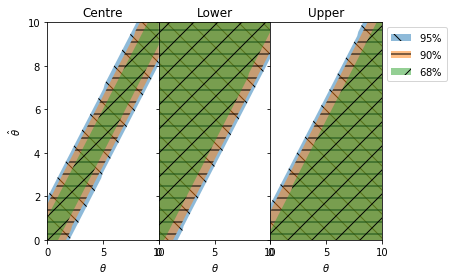

In [18]:
plotcl(xrng,murng,gcdf,[.95,.9,.68],{.95:'\\',.9:'-',.68:'/'});

## Poisson Distribution - $P(\lambda)$

The Poisson distribution is given by _probability mass function_ 

$$ f(n;\lambda) = \frac{\lambda^{n}e^{-\lambda}}{n!}\quad n=\in\mathbb{N}_0\quad,$$ 

which is a _discrete_ probability distribution.  

In [19]:
lamb, n, k = sy.symbols('lambda n k',integer=True,nonnegative=True)
p = sy.symbols('p',real=True,nonnegative=True)
f = lamb**n * sy.exp(-lamb) / sy.factorial(n)
sy.Eq(sy.Function('f')(n,lamb),f)

It is easy to see that the cumulative distribution function (CDF) is given by 

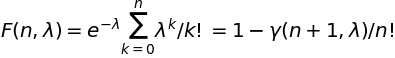

In [20]:
F = sy.exp(-lamb)*sy.Sum(lamb**k/sy.factorial(k),(k,0,n))
sy.Eq(sy.Eq(sy.Function('F')(n,lamb),F),F.doit().simplify(),evaluate=False)

Here, $\gamma$ is the lower [incomplete $\Gamma$ function](https://en.wikipedia.org/wiki/Incomplete_gamma_function) given by 

$$\gamma(n,\lambda)=\int_{0}^{\lambda}dt\,t^{n-1}\,\mathrm {e} ^{-t}\quad.$$

There is unfortunately no ready solution for 

$$F(n;\gamma) = p\quad,$$ 

so we cannot invert it as we did for the normal distribution above.  Thus, we will evaluate the confidence limits numerically.  Luckily, we've already done half the work - all we need to do is to evaluate the CDf over some values of $n$ and $\lambda$

In [21]:
nrng = np.linspace(0,30,31)[:,np.newaxis]
lrng = np.linspace(0,15,301)
pcdf = sp.stats.poisson.cdf(nrng,lrng)

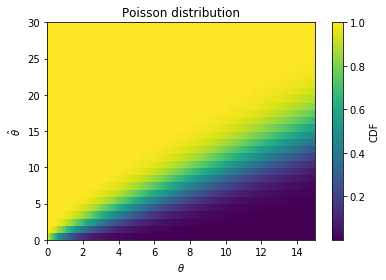

In [22]:
plt.pcolor(*np.meshgrid(lrng,nrng),pcdf)
plt.colorbar(label='CDF')
plt.title('Poisson distribution')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\hat\theta$');

We can use the function defined above to plot our confidence bands 

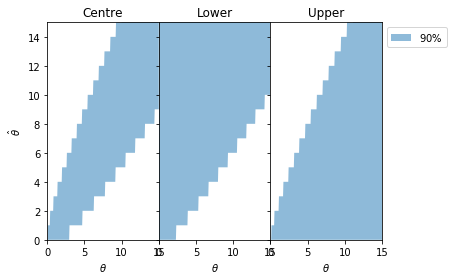

In [23]:
cl = plotcl(nrng,lrng,pcdf,[.9])

In [24]:
pch  = lrng[np.where(cl[0.9][0][0]==8)][0]
pcl  = lrng[np.where(cl[0.9][0][1]==8)][-1]
pup  = lrng[np.where(cl[0.9][1][0]==8)][0]
plo  = lrng[np.where(cl[0.9][2][0]==8)][-1]
print(f'Central 90% C.L.: {pcl:.3}-{pch:.3}\n'
      f'Lower 90% C.L.:   {plo:.3}\n'
      f'Upper 90% C.L.:   {pup:.3}') 

Central 90% C.L.: 4.65-13.2
Lower 90% C.L.:   5.4
Upper 90% C.L.:   11.8


## Feldman-Cousines 

The [Feldman-Cousines method](https://arxiv.org/abs/physics/9711021) for estimating confidence limits takes a somewhat different approach to issue.  The method is summarised below.  

Suppose we have a PDF $f$ of some observable with the proposed parameter $\theta$ 

$$f(x;\theta)\quad.$$ 

Given the measurement $x$, we can construct the likelihood of that measurement given $f$ and $\theta$ 

$$L(x,\theta) = f(x;\theta)\quad$$ 

We know want to know, what is the confidence _limits_ $(l,h)$ we should quote for a particular confidence _level_  $(p)$.  The idea is then to evaluate - for all possible values of $y_i=x$ (given $\theta)$, the most likely $\hat\theta$, i.e., to maximize 

$$L(y_i,\hat\theta) = f(y_i;\hat\theta)\quad,$$  

and to calculate the likelihood of the hypothesis $\theta$ 

$$L(y_i,\theta) = f(y_i;\theta)\quad.$$

For each possible $y$, we form the likelihood ratio - called the _rank_ in this method 

$$R(y_i) = \frac{L(y_i;\theta)}{L(y_i;\hat\theta)}\quad,$$ 

and order these $y_i$ in decreasing value of $R(y_i)$.  We then include the smallest set $s=\{y_i|y_i\ \mathrm{ranked}\}$ such that  

$$\sum_{y_i\in s} L(y_i,\theta) = \sum_{y_i\in s}f(y_i;\theta) \ge p\quad.$$

The confidence _limits_ at the confidence _level_ is then 

$$[\min s, \max s]\quad.$$

First, we make a function that calculates the rank $R(y_i)$ give 

- the PDF $f$
- the measurement $y_i$ 
- the hypothesis value $\theta$ 
- the best estimator value $\hat\theta$ 

which returns 

$$L(y_i,\theta),R(y_i),y_i\quad.$$ 

In [25]:
def rank(pdf,measurement,hypothesis,best):
    lhyp = pdf(measurement,hypothesis)
    lopt = pdf(measurement,best)
    r    = lhyp / lopt
    return np.array((lhyp, r, np.tile(measurement,r.shape[1]))).T

This function will be repeatedly evaluated for _all_ possible values of $y_i$ for a given hypothesis $\theta$.  Note, in general the best estimator $\hat\theta$ is a function of $y_i$, and we do not assume any particular form here.  

Next up, we code a function that takes a list of the three-tuples 

$$L(y_i,\theta),R(y_i),y_i\quad,$$ 

as returned by the above, sorts them (indirectly) in descending order of $R(y_i)$, and forms the cumulative of $L(y_i,\theta)$.  We then pick out the $y_i$ values of the sorted list for which the cumulative sum is smaller than or equal to the desired confidence level.  The least and largest values of $y_i$ are then returned.  

In [26]:
def fccl(ranked,p,fuzzy=0):
    srt = ranked.argsort(axis=1)[:,::-1,1]
    id1 = np.array([range(len(srt))]*len(srt[0])).T
    cms = np.cumsum(ranked[id1,srt,0],axis=1)
    inc = np.where(cms<=(p+fuzzy),ranked[id1,srt,2],np.nan)
    
    with np.errstate(all='ignore'):
        mim = np.nanmin(inc,axis=1)
        mam = np.nanmax(inc,axis=1)
    
    return np.vstack((mim,mam)).T

Now, let us apply this to a Poisson distribution with a known background of 3.  Thus, our pmf becomes 

$$f(n,\lambda) = \frac{\lambda^{n+3}e^{-\lambda}}{(n+3)!}\quad n=\in\mathbb{N}_0\quad,$$ 


**Note**: It is not clear from the slides that $b=3$. 

The estimator given the observation $n$ is simply $n$, so we pass that in for the best fit value.  

Note, we pass `n` as a two-dimensional object so that the NumPy broadcasting rules ensures that we get as many limits back as we have input $\lambda$ values (20 here). 

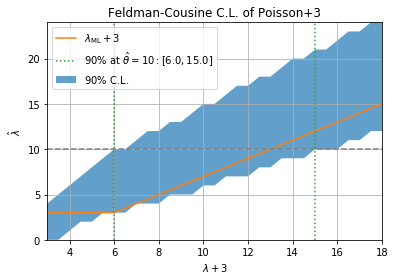

In [27]:
f    = sp.stats.poisson.pmf 
n    = np.linspace(0,24,25)[:,np.newaxis]
lamb = np.linspace(3,18,int((18-3)//0.5+1))
est  = np.maximum(0,n-3)+3
r    = rank(f,n,lamb,est)
cl   = fccl(r,.90,0.0)

if len(r) > 1:
    plt.fill_between(lamb,cl[:,0],cl[:,1],alpha=.7,
                     label=r'$90\%$ C.L.')
    plt.plot(lamb[::2],est[:16,0],color='C1',
             label=r'$\lambda_{\mathrm{ML}}+3$')
    plt.axhline(10,ls='--',color='gray')
    
    l10 = lamb[np.argmax(cl[:,1]==10)]
    h10 = lamb[np.argmax(cl[:,0]==10)]
    plt.axvline(l10,ls=':',color='C2',
                label=fr'$90\%$ at $\hat\theta=10: [{l10},{h10}]$')
    plt.axvline(h10,ls=':',color='C2')
    
    plt.xlabel(r'$\lambda+3$')
    plt.ylabel(r'$\hat\lambda$')
    plt.xlim(lamb[0],lamb[-1])
    plt.ylim(n[0],n[-1])
    plt.title('Feldman-Cousine C.L. of Poisson+3')
    plt.legend(loc='upper left')
    plt.grid();